<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# Regression Models with Keras

Estimated time needed: **45** mins


## Introduction


As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.


## Objectives for this Notebook    
* How to use the Keras library to build a regression model
* Download and clean the data set
* Build a neural network
* Train and test the network     



<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>
1. <a href="#Download-and-Clean-the-Data-Set">Download and Clean the Data Set</a><br>
2. <a href="#Import-Keras-Packages">Import Keras Packages</a><br>
3. <a href="#Build-a-Neural-Network">Build a Neural Network</a><br>
4. <a href="#Train-and-Test-the-Network">Train and Test the Network</a><br>  

</font>
</div>


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
# All Libraries required for this lab are listed below. 

!pip install numpy==2.0.2
!pip install pandas==2.2.2
!pip install tensorflow_cpu==2.18.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 MB 40.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 47.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 33.3 MB/s eta 0:00:00


#### To use Keras, you will also need to install a backend framework – such as TensorFlow.

If you install TensorFlow 2.16 or above, it will install Keras by default.

We are using the CPU version of tensorflow since we are dealing with smaller datasets. 
You may install the GPU version of tensorflow on your machine to accelarate the processing of larger datasets


#### Suppress the tensorflow warning messages
We use the following code to  suppress the warning messages due to use of CPU architechture for tensoflow.

You may want to **comment out** these lines if you are using the GPU architechture


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import pandas as pd
import numpy as np
import keras

import warnings
warnings.simplefilter('ignore', FutureWarning)

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

* Cement
* Blast furnace slag
* Fly ash
* Water
* Superplasticizer
* Coarse aggregate
* Fine aggregate


## Download and Clean the Data Set


Let's download the data and read it into a <em>pandas</em> dataframe.


In [4]:
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have


In [5]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [6]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [8]:
concrete_data_columns = concrete_data.columns

In [9]:
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [10]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [11]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [14]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [16]:
n_cols = predictors_norm.shape[1] # number of predictors

8

<a id="item1"></a>


##  Import Keras Packages

##### Let's import the rest of the packages from the Keras library that we will need to build our regression model.


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [18]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.


## Train and Test the Network


Let's call the function now to create our model.


In [19]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [20]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - 55ms/step - loss: 1662.6980 - val_loss: 1163.1456
Epoch 2/100
23/23 - 0s - 7ms/step - loss: 1534.2292 - val_loss: 1054.0481
Epoch 3/100
23/23 - 0s - 7ms/step - loss: 1329.6720 - val_loss: 879.8448
Epoch 4/100
23/23 - 0s - 7ms/step - loss: 1009.7085 - val_loss: 646.1907
Epoch 5/100
23/23 - 0s - 7ms/step - loss: 630.8577 - val_loss: 413.5636
Epoch 6/100
23/23 - 0s - 7ms/step - loss: 349.7711 - val_loss: 260.5688
Epoch 7/100
23/23 - 0s - 6ms/step - loss: 244.4507 - val_loss: 203.5667
Epoch 8/100
23/23 - 0s - 7ms/step - loss: 219.4432 - val_loss: 187.6116
Epoch 9/100
23/23 - 0s - 7ms/step - loss: 207.4417 - val_loss: 176.5599
Epoch 10/100
23/23 - 0s - 7ms/step - loss: 197.0939 - val_loss: 174.7402
Epoch 11/100
23/23 - 0s - 6ms/step - loss: 189.9855 - val_loss: 167.9519
Epoch 12/100
23/23 - 0s - 7ms/step - loss: 182.9062 - val_loss: 165.6594
Epoch 13/100
23/23 - 0s - 6ms/step - loss: 177.0182 - val_loss: 161.6741
Epoch 14/100
23/23 - 0s - 7ms/step - loss: 172.0563 -

<strong>You can refer to this [link](https://keras.io/models/sequential/) to learn about other functions that you can use for prediction or evaluation.</strong>


Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


<h3>Practice Exercise 1</h3>


Now using the same dateset,try to recreate regression model featuring five hidden layers, each with 50 nodes and ReLU activation functions, a single output layer, optimized using the Adam optimizer.


In [22]:
# Write your code here
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


Epoch 1/100
23/23 - 2s - 94ms/step - loss: 1628.0709 - val_loss: 1025.4927
Epoch 2/100
23/23 - 0s - 9ms/step - loss: 943.2296 - val_loss: 267.5099
Epoch 3/100
23/23 - 0s - 8ms/step - loss: 281.9033 - val_loss: 240.3836
Epoch 4/100
23/23 - 0s - 9ms/step - loss: 219.2894 - val_loss: 218.9201
Epoch 5/100
23/23 - 0s - 8ms/step - loss: 201.5900 - val_loss: 239.6565
Epoch 6/100
23/23 - 0s - 9ms/step - loss: 183.6333 - val_loss: 244.0722
Epoch 7/100
23/23 - 0s - 7ms/step - loss: 172.0940 - val_loss: 217.4074
Epoch 8/100
23/23 - 0s - 8ms/step - loss: 161.0309 - val_loss: 223.5697
Epoch 9/100
23/23 - 0s - 8ms/step - loss: 151.3895 - val_loss: 209.1481
Epoch 10/100
23/23 - 0s - 7ms/step - loss: 139.9847 - val_loss: 197.1511
Epoch 11/100
23/23 - 0s - 8ms/step - loss: 128.0063 - val_loss: 208.1019
Epoch 12/100
23/23 - 0s - 8ms/step - loss: 117.0681 - val_loss: 191.5824
Epoch 13/100
23/23 - 0s - 8ms/step - loss: 103.3663 - val_loss: 195.7657
Epoch 14/100
23/23 - 0s - 7ms/step - loss: 94.7372 - val_

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
def regression_model():
    input_colm = predictors_norm.shape[1] # Number of input features
    # create model
    model = Sequential()
    model.add(Input(shape=(input_colm,)))  # Set the number of input features 
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu')) 
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(1))  # Output layer
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

-->


<h3>Practice Exercise 2</h3>


 Train and evaluate the model simultaneously using the fit() method by reserving 10% of the data for validation and training the model for 100 epochs


In [27]:
# Write your code here
model = regression_model()
pred = model.fit(predictors_norm, target, validation_split=0.1,epochs=100,verbose=2)

Epoch 1/100
29/29 - 2s - 86ms/step - loss: 1488.1904 - val_loss: 899.9122
Epoch 2/100
29/29 - 0s - 8ms/step - loss: 575.8832 - val_loss: 228.6488
Epoch 3/100
29/29 - 0s - 7ms/step - loss: 222.5935 - val_loss: 226.3488
Epoch 4/100
29/29 - 0s - 6ms/step - loss: 195.4889 - val_loss: 191.7321
Epoch 5/100
29/29 - 0s - 6ms/step - loss: 176.1741 - val_loss: 185.5726
Epoch 6/100
29/29 - 0s - 7ms/step - loss: 158.8591 - val_loss: 156.6860
Epoch 7/100
29/29 - 0s - 6ms/step - loss: 141.3442 - val_loss: 149.5611
Epoch 8/100
29/29 - 0s - 7ms/step - loss: 125.8748 - val_loss: 124.6370
Epoch 9/100
29/29 - 0s - 7ms/step - loss: 108.6005 - val_loss: 114.0400
Epoch 10/100
29/29 - 0s - 6ms/step - loss: 94.1680 - val_loss: 103.0469
Epoch 11/100
29/29 - 0s - 6ms/step - loss: 81.7215 - val_loss: 90.2311
Epoch 12/100
29/29 - 0s - 8ms/step - loss: 69.9103 - val_loss: 72.3486
Epoch 13/100
29/29 - 0s - 7ms/step - loss: 62.8027 - val_loss: 67.1386
Epoch 14/100
29/29 - 0s - 7ms/step - loss: 54.9500 - val_loss: 63

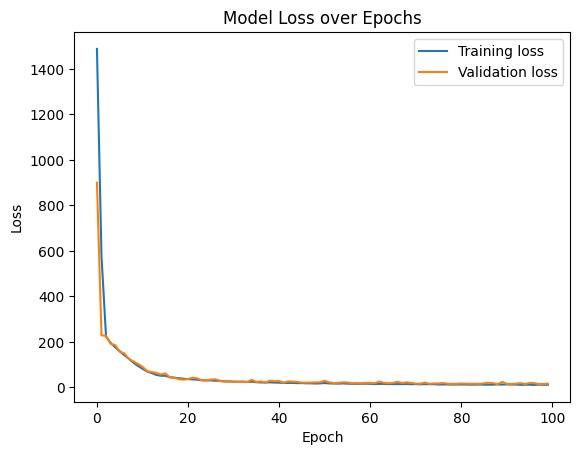

In [28]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(pred.history['loss'], label='Training loss')
plt.plot(pred.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
# build the model
model = regression_model()
model.fit(predictors_norm, target, validation_split=0.1, epochs=100, verbose=2)

-->


Based on the results, we notice that:

- Adding more hidden layers to the model increases its capacity to learn and represent complex relationships within the data. This allows the model to better identify, as a result, the model becomes more effective at fitting the training data and potentially improving its predictions.
- By reducing the proportion of data set aside for validation and using a larger portion for training, the model has access to more examples to learn from. This additional training data helps the model improve its understanding of the underlying trends, which can lead to better overall performance.  


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  | Aman  |  Updated the library versions to current |
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  | Aman  |  Updated the library versions to current |
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>

